#  Загрузка предобученных эмбеддингов

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://rusvectores.org/
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
* https://github.com/natasha/navec
* https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html

## Задачи для совместного разбора

1\. Создайте объект `nn.Embedding` на основе файла `ruscorpora_upos_skipgram_300_5_2018_sample.vec`.

In [ ]:
import torch as th

In [ ]:
embeddings = {}
index = {}
with open("ruscorpora_upos_skipgram_300_5_2018_sample.vec", "r", encoding="utf8") as fp:
  fp.readline()
  for idx, line in enumerate(fp):
    word_pos, v = line.split(" ", maxsplit=1)
    word, pos = word_pos.split("_")
    v = [float(x) for x in v.split()]
    embeddings[(word, pos)] = v
    index[(word, pos)] = idx

In [ ]:
embeddings_t = th.Tensor(list(embeddings.values()))

In [ ]:
embeddings_t

tensor([[-0.0312,  0.0243, -0.0314,  ..., -0.0880,  0.0217, -0.0011],
        [-0.0091,  0.0305,  0.0016,  ..., -0.0671,  0.0900,  0.0647],
        [ 0.0092,  0.0413,  0.0039,  ..., -0.0028,  0.0904,  0.0656],
        [-0.0611,  0.0601,  0.0791,  ..., -0.0239,  0.0646,  0.0744]])

In [ ]:
word = "человек"
pos = "NOUN"

embeddings_t[index[(word, pos)]]

In [ ]:
import torch.nn as nn

In [ ]:
e = nn.Embedding(num_embeddings=4, embedding_dim=300)

In [ ]:
e(th.LongTensor([3]))

In [ ]:
t = th.tensor([3], dtype=th.long)
t, type(t)

(tensor([3]), torch.Tensor)

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Воспользовавшись предобученными эмбеддингами [ruscorpora_upos_skipgram_300_5_2018](https://rusvectores.org/static/models/rusvectores4/RNC/ruscorpora_upos_skipgram_300_5_2018.vec.gz), создайте словарь, где ключом является кортеж из слова и части речи, а значением - номер этого слова в файле эмбеддингами (первую строку при расчете номера строк не учитывайте). Выведите на экран количество элементов в словаре. Создайте двумерный массив эмбеддингов и выведите на экран его форму.

- [ ] Проверено на семинаре

In [7]:
import torch as th

In [77]:
embeddings = {}
index = {}
itow = {}

with open("ruscorpora_upos_skipgram_300_5_2018.vec", "r", encoding="utf8") as fp:
  fp.readline()
  for idx, line in enumerate(fp):
    word_pos, v = line.split(" ", maxsplit=1)
    word, pos = word_pos.split("_")
    v = [float(x) for x in v.split()]
    embeddings[(word, pos)] = v
    index[(word, pos)] = idx
    itow[idx] = (word, pos)

In [78]:
len(index)

195071

In [79]:
embeddings_t = th.Tensor(list(embeddings.values()))
embeddings_t.shape

torch.Size([195071, 300])

<p class="task" id="2"></p>

2\. Используя PCA, уменьшите размерность загруженных эмбеддингов до 2. Визуализируйте на плоскости точки для слов "кот", "кошка", "собака", "киса", "овчарка", "студент", "препод". Добавьте для точек подписи.

- [ ] Проверено на семинаре

In [80]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [81]:
pca = PCA(n_components=2)
pca.fit(embeddings_t)
embeddings_t_2 = pca.transform(embeddings_t)
embeddings_t_2

array([[ 0.05368402, -0.06162436],
       [ 0.25408442, -0.07486543],
       [ 0.31490063,  0.09017937],
       ...,
       [-0.25629815, -0.1782016 ],
       [ 0.4814758 ,  0.25856829],
       [-0.06907251, -0.37088888]])

In [92]:
words = ["кот", "кошка", "собака", "киса", "овчарка", "студент", "препод"]
indexes = [index[(w, 'NOUN')] for w in words]

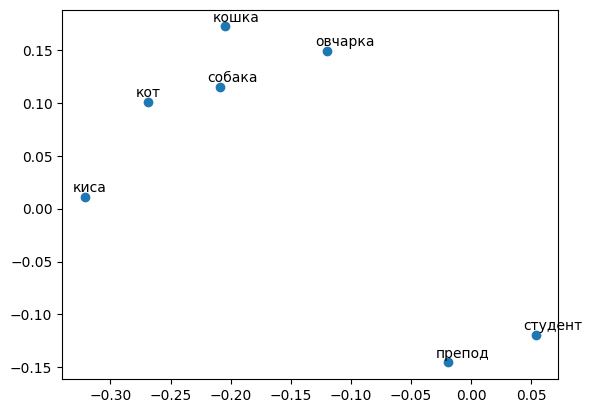

In [104]:
fig, ax = plt.subplots()
ax.scatter(embeddings_t_2[indexes][:,0], embeddings_t_2[indexes][:,1])

#words = words[:4]
for i, txt in enumerate(words):
    ax.annotate(txt, (embeddings_t_2[indexes][i,0]-0.01, embeddings_t_2[indexes][i,1]+0.005))

<p class="task" id="3"></p>

3\. Напишите функцию, которая для заданного слова `word` находит `k` ближайших слов в смысле евклидова расстояния между эмбеддингами. Продемонстрируйте работу функции на словах из предыдущего задания.

- [ ] Проверено на семинаре

In [105]:
def k_sim(k, word):
  emb = embeddings_t[index[word]]
  dist = (embeddings_t - emb).pow(2).sum(dim=1)
  k_sim_idx = th.argsort(dist)[:k+1]
  return k_sim_idx, dist[k_sim_idx]

In [110]:
k = 2
words = ["кот", "кошка", "собака", "киса", "овчарка", "студент", "препод"]

for w in words:
  idx_sim, similarity = k_sim(k, (w, 'NOUN'))
  print(f'ближайшие слова для {w}')
  for i in range(1,len(idx_sim)):
    print(itow[idx_sim[i].item()], similarity[i].item())
  print()

ближайшие слова для кот
('кошка', 'NOUN') 0.4388558566570282
('котенок', 'NOUN') 0.629873514175415

ближайшие слова для кошка
('кот', 'NOUN') 0.4388558566570282
('собака', 'NOUN') 0.5831884145736694

ближайшие слова для собака
('пес', 'NOUN') 0.39075443148612976
('кошка', 'NOUN') 0.5831884145736694

ближайшие слова для киса
('-ой', 'NOUN') 0.7401083111763
('якши', 'PROPN') 0.7595261931419373

ближайшие слова для овчарка
('пес', 'NOUN') 0.5917913913726807
('собака', 'NOUN') 0.5964013934135437

ближайшие слова для студент
('аспирант', 'NOUN') 0.5797818899154663
('преподаватель', 'NOUN') 0.6348735690116882

ближайшие слова для препод
('иняз', 'NOUN') 0.876899242401123
('дубенко', 'PROPN') 0.8883008360862732



<p class="task" id="4"></p>

4\. Создайте слой `nn.Embedding` на основе загруженных эмбеддингов. Для каждого слова из задания 2 найдите соотетствующий ему индекс. Используя найденные индексы, получите для каждого слова его векторное представление. Выведите форму полученного тензора.

- [ ] Проверено на семинаре

In [76]:
import torch.nn as nn

In [138]:
n, d = embeddings_t.shape
print(n,d)

e = nn.Embedding.from_pretrained(embeddings_t)
e

195071 300


Embedding(195071, 300)

In [139]:
words = ["кот", "кошка", "собака", "киса", "овчарка", "студент", "препод"]
indexes = [index[(w, 'NOUN')] for w in words]


e(th.LongTensor(indexes)).shape

torch.Size([7, 300])

In [144]:
(e(th.LongTensor([1])) == embeddings_t[1]).all()

tensor(True)

<p class="task" id="5"></p>

5\. Создайте новый вариант `nn.Embedding`, где для нулевого индекса возвращается тензор из нулей, а для первого индекса возвращается тензор из чисел $\frac{1}{300}$. Выведите на экран размер количество эмбеддингов и эмбеддинги для индексов 0 и 1.

- [ ] Проверено на семинаре

In [171]:
a = th.cat([th.zeros((1,300)), th.ones((1,300))/300, embeddings_t], dim=0)
e5 = nn.Embedding.from_pretrained(a)
e5

Embedding(195073, 300)

In [175]:
e5(th.LongTensor([0]))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [173]:
e5(th.LongTensor([1]))

tensor([[0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0

<p class="task" id="6"></p>

6\. Для каждого слова в каждом предложении батча получите его индекс. При поиске индекса слова приводите слово к нормальной форме. Части речи для простоты можно не учитывать. В случае отсутствия слова в словаре используйте индекс 1. Дополните все наборы индексов до одного размера индексом 0. Используя найденные индексы, получите для каждого слова в каждом предложении его векторное представление. Выведите форму полученного тензора.

Получите векторное представление каждого предложения путем усреднения эмбеддингов слов этого предложения. Выведите форму результата на экран.

- [ ] Проверено на семинаре

In [ ]:
#!pip install pymorphy2

In [182]:
import pymorphy2
from nltk import word_tokenize
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [202]:
sents = [
    "робот пылесос только что опередил меня и сожрал попкорнину которую я хотел поднять",
    "я приходил к хирургу он мне предложил отрезать ухо"
]

morph = pymorphy2.MorphAnalyzer()

sents_to_tokens = [
    #[(morph.parse(w)[0].normal_form, morph.parse(w)[0].tag.POS) for w in word_tokenize(text.lower())]
    [morph.parse(w)[0].normal_form for w in word_tokenize(text.lower())]
    for text in sents
]
sents_to_tokens

[['робот',
  'пылесос',
  'только',
  'что',
  'опередить',
  'я',
  'и',
  'сожрать',
  'попкорнин',
  'который',
  'я',
  'хотеть',
  'поднять'],
 ['я', 'приходить', 'к', 'хирург', 'он', 'я', 'предложить', 'отрезать', 'ухо']]

In [203]:
def find_idx_by_word(word):
  for k in index:
    if word in k:
      return index[k]
  return 1

In [211]:
sent_idxs = [[find_idx_by_word(w) for w in sent] for sent in sents_to_tokens]
mx_len = len(sent_idxs[0])
sent_idxs[1].extend([0]*(mx_len-len(sent_idxs[1])))
sent_idxs

[[8121, 18358, 1, 1, 20369, 77780, 1, 18827, 1, 1, 77780, 29, 5658],
 [77780, 47, 1, 5941, 1, 77780, 10397, 3653, 584, 0, 0, 0, 0]]

In [219]:
emb_sent_word = e5(th.LongTensor(sent_idxs))
emb_sent_word[:,:5]

tensor([[[ 0.0509, -0.0621,  0.0309,  ...,  0.0714,  0.1030,  0.0879],
         [-0.0204,  0.0529,  0.0057,  ..., -0.0069,  0.0785,  0.0230],
         [ 0.0033,  0.0033,  0.0033,  ...,  0.0033,  0.0033,  0.0033],
         [ 0.0033,  0.0033,  0.0033,  ...,  0.0033,  0.0033,  0.0033],
         [-0.0050, -0.1003,  0.1158,  ..., -0.0282,  0.0416,  0.0247]],

        [[ 0.0551, -0.0024, -0.0474,  ...,  0.1245,  0.1254, -0.0545],
         [-0.0297, -0.0360, -0.0078,  ..., -0.0665,  0.0334,  0.0239],
         [ 0.0033,  0.0033,  0.0033,  ...,  0.0033,  0.0033,  0.0033],
         [-0.0949, -0.0987,  0.0579,  ..., -0.1376, -0.0365, -0.0289],
         [ 0.0033,  0.0033,  0.0033,  ...,  0.0033,  0.0033,  0.0033]]])

In [223]:
# форма полученного тензора
emb_sent_word.shape

torch.Size([2, 13, 300])

In [224]:
emb_sent = emb_sent_word.mean(dim=1)
emb_sent.shape

torch.Size([2, 300])

<p class="task" id="7"></p>

7\. Загрузите модель [navec_hudlit_v1_12B_500K_300d_100q.tar](https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar) с помощью пакета `navec`. Для каждого слова в каждом предложении батча получите его индекс. При поиске индекса слова приводите слово к нормальной форме. В случае отсутствия слова в словаре используйте индекс токена `<unk>`. Дополните все наборы индексов до одного размера индексом токена `<pad>`. Используя найденные индексы, получите для каждого слова в каждом предложении его векторное представление.  Выведите форму полученного тензора.

- [ ] Проверено на семинаре

In [ ]:
#!pip install navec

In [229]:
from navec import Navec

path = 'navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [230]:
sents = [
    "робот пылесос только что опередил меня и сожрал попкорнину которую я хотел поднять",
    "я приходил к хирургу он мне предложил отрезать ухо"
]

morph = pymorphy2.MorphAnalyzer()

sents_to_tokens = [
    [morph.parse(w)[0].normal_form for w in word_tokenize(text.lower())]
    for text in sents
]
sents_to_tokens

[['робот',
  'пылесос',
  'только',
  'что',
  'опередить',
  'я',
  'и',
  'сожрать',
  'попкорнин',
  'который',
  'я',
  'хотеть',
  'поднять'],
 ['я', 'приходить', 'к', 'хирург', 'он', 'я', 'предложить', 'отрезать', 'ухо']]

In [231]:
sent_idxs = [[navec.vocab.get(w, navec.vocab.unk_id) for w in sent] for sent in sents_to_tokens]
mx_len = len(sent_idxs[0])
sent_idxs[1].extend([navec.vocab.pad_id]*(mx_len-len(sent_idxs[1])))
sent_idxs

[[378109,
  357295,
  436756,
  482066,
  267912,
  497765,
  146473,
  408788,
  500000,
  182773,
  497765,
  473233,
  309105],
 [497765,
  342851,
  160196,
  470904,
  267308,
  497765,
  330993,
  280341,
  459125,
  500001,
  500001,
  500001,
  500001]]

In [ ]:
#!pip install slovnet

In [234]:
from slovnet.model.emb import NavecEmbedding

In [237]:
emb = NavecEmbedding(navec)
input = th.tensor(sent_idxs)
output = emb(input)

output[:,:5]

tensor([[[ 0.0482, -0.2004,  0.0586,  ..., -0.0513,  0.1501, -0.0794],
         [ 0.1271, -0.3411,  0.2109,  ..., -0.3036, -0.0216, -0.1722],
         [ 0.1864, -0.2708, -0.3037,  ..., -0.3365, -0.1798,  0.2134],
         [-0.2598, -0.1137, -0.1642,  ..., -0.2754,  0.0252,  0.3528],
         [-0.3389,  0.0122,  0.1750,  ...,  0.3387, -0.1046, -0.0112]],

        [[-0.3499, -0.3076, -0.2750,  ..., -0.5250,  0.1350,  0.2226],
         [ 0.3243, -0.4076,  0.0372,  ..., -0.1711, -0.6538,  0.2975],
         [-0.5378, -0.6289, -0.3964,  ...,  0.3389,  0.0566, -0.0853],
         [-0.3632,  0.3156,  0.4119,  ..., -0.2830,  0.0795, -0.3353],
         [-0.5378, -0.6289, -0.3964,  ..., -0.2799, -0.1566, -0.0046]]])

In [238]:
output.shape

torch.Size([2, 13, 300])

## Обратная связь
- [ ] Хочу получить обратную связь по решению